In [1]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [6]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-0.12144414, -0.28687924,  0.29729018,  0.22324091, -0.16709512,
        -0.40137875, -0.04336579,  0.187286  ,  0.18374988,  0.22927833]],
      dtype=float32)

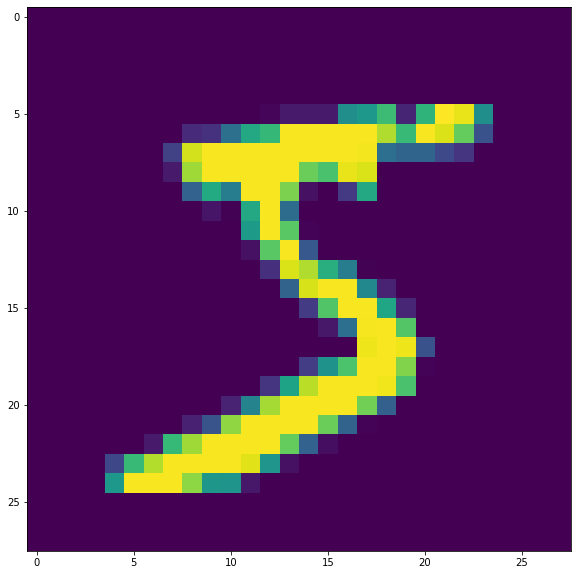

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[0])

In [8]:
sm_pred = tf.nn.softmax(predictions).numpy()
print(sm_pred)

[[0.08539566 0.07237494 0.1298045  0.12053981 0.08158489 0.06454486
  0.0923304  0.11628281 0.11587235 0.12126977]]


In [9]:
np.argmax(sm_pred)

2

In [10]:
y_train[0]

5

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train[:1], predictions).numpy()

2.7403948

In [13]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [14]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 2.3763 - accuracy: 0.0863


[2.3433294448852537, 0.0863]

In [15]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2637 - accuracy: 0.9203
Epoch 2/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1249 - accuracy: 0.9621
Epoch 3/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0906 - accuracy: 0.9721
Epoch 4/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0769 - accuracy: 0.9762
Epoch 5/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0652 - accuracy: 0.9794


In [16]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 0.0346 - accuracy: 0.9806


[0.06890088169693481, 0.9806]

In [17]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [18]:
probability_model(x_test[4:5]).numpy()

array([[1.25813351e-08, 1.02118328e-07, 6.56128947e-08, 2.38844472e-10,
        9.99847412e-01, 1.35708325e-08, 6.87800892e-08, 2.37591921e-05,
        1.76564399e-08, 1.28490981e-04]], dtype=float32)

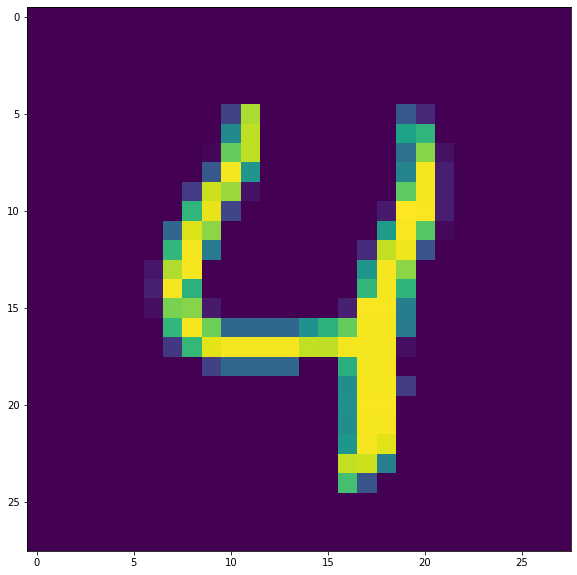

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(x_test[4])